In [9]:
from bayesian_modelling_utils import *
from supervised_utils import train_and_test_naive_bayes

### Tentativo di migliorare le performance di classificazione con Naive Bayes

***

> TESTING...
Accuracy: 50.49%



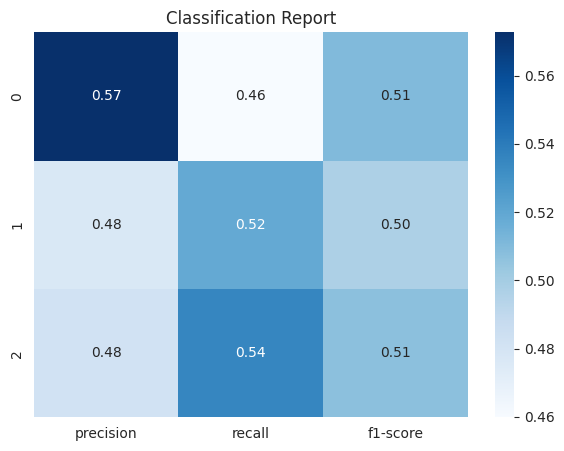

In [10]:
df = pd.read_csv("../data/movies_features_nb.csv")
df = df[df["id"] > 1390] # rimuovo i film più vecchi di 30 anni
df.to_csv("../data/movies_features_nb_last30.csv", index=False)

cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity_cat"],
    "dummies": ["age_cat", "rating_cat", "genre_cat", "runtime_cat", "score_cat", "budget_cat",
                "director_age_cat", "director_experience_cat", "director_efficiency_cat",
                "star_age_cat", "star_experience_cat", "star_efficiency_cat"],
    "labels": [],
    "standardize": [],
    "minmax": []
}

# addestro e testo il modello naive bayes
train_and_test_naive_bayes(df, cols, mode="multinomial", resample=False, session_name="v2")

***

> TESTING...
Accuracy: 47.65%



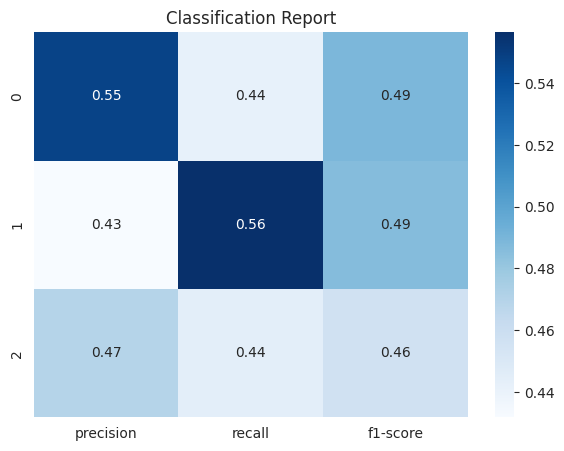

In [11]:
# addestro e testo il modello naive bayes (con resampling)
train_and_test_naive_bayes(df, cols, mode="multinomial", resample=True, session_name="v2(resampled)")

### Modellazione della relazione causale tra le variabili

In [12]:
df = pd.read_csv("../data/movies_features_nb_last30.csv")
df = process_df(df, drop_cols=["id", "title"])

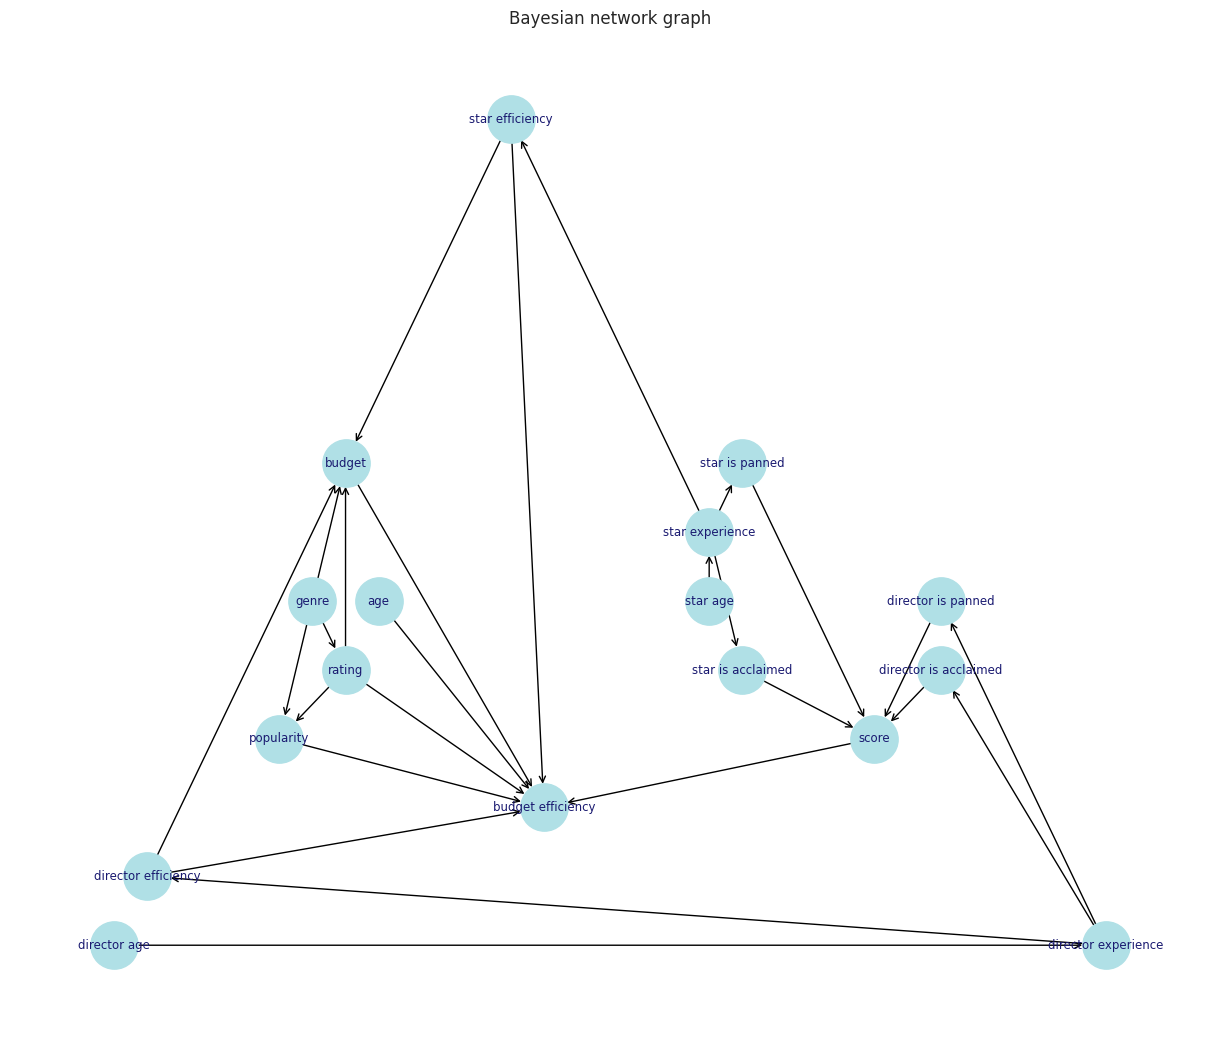

In [13]:
# Modellazione manuale
edges = [
    ("director_age_cat", "director_experience_cat"),
    ("director_experience_cat", "director_efficiency_cat"),
    ("director_experience_cat", "director_is_panned"),
    ("director_experience_cat", "director_is_acclaimed"),
    ("director_efficiency_cat", "budget_cat"),
    ("director_efficiency_cat", "budget_efficiency_cat"),
    ("star_age_cat", "star_experience_cat"),
    ("star_experience_cat", "star_efficiency_cat"),
    ("star_experience_cat", "star_is_panned"),
    ("star_experience_cat", "star_is_acclaimed"),
    ("star_efficiency_cat", "budget_cat"),
    ("star_efficiency_cat", "budget_efficiency_cat"),
    ("director_is_panned", "score_cat"),
    ("director_is_acclaimed", "score_cat"),
    ("star_is_panned", "score_cat"),
    ("star_is_acclaimed", "score_cat"),
    ("popularity_cat", "budget_efficiency_cat"),
    ("budget_cat", "budget_efficiency_cat"),
    ("rating_cat", "budget_efficiency_cat"),
    ("score_cat", "budget_efficiency_cat"),
    ("age_cat", "budget_efficiency_cat"),
    ("rating_cat", "popularity_cat"),
    ("genre_cat", "popularity_cat"),
    ("rating_cat", "budget_cat"),
    ("genre_cat", "budget_cat"),
    ("genre_cat", "rating_cat")
]

# costruisco e apprendo il modello ipotizzato
model = BayesianNetwork(edges)
model = learn_model_cpds(model, df)

visualize_bayesian_model(model)

### Rete Bayesiana appresa dai dati

  0%|          | 31/1000000 [00:01<17:51:29, 15.55it/s]


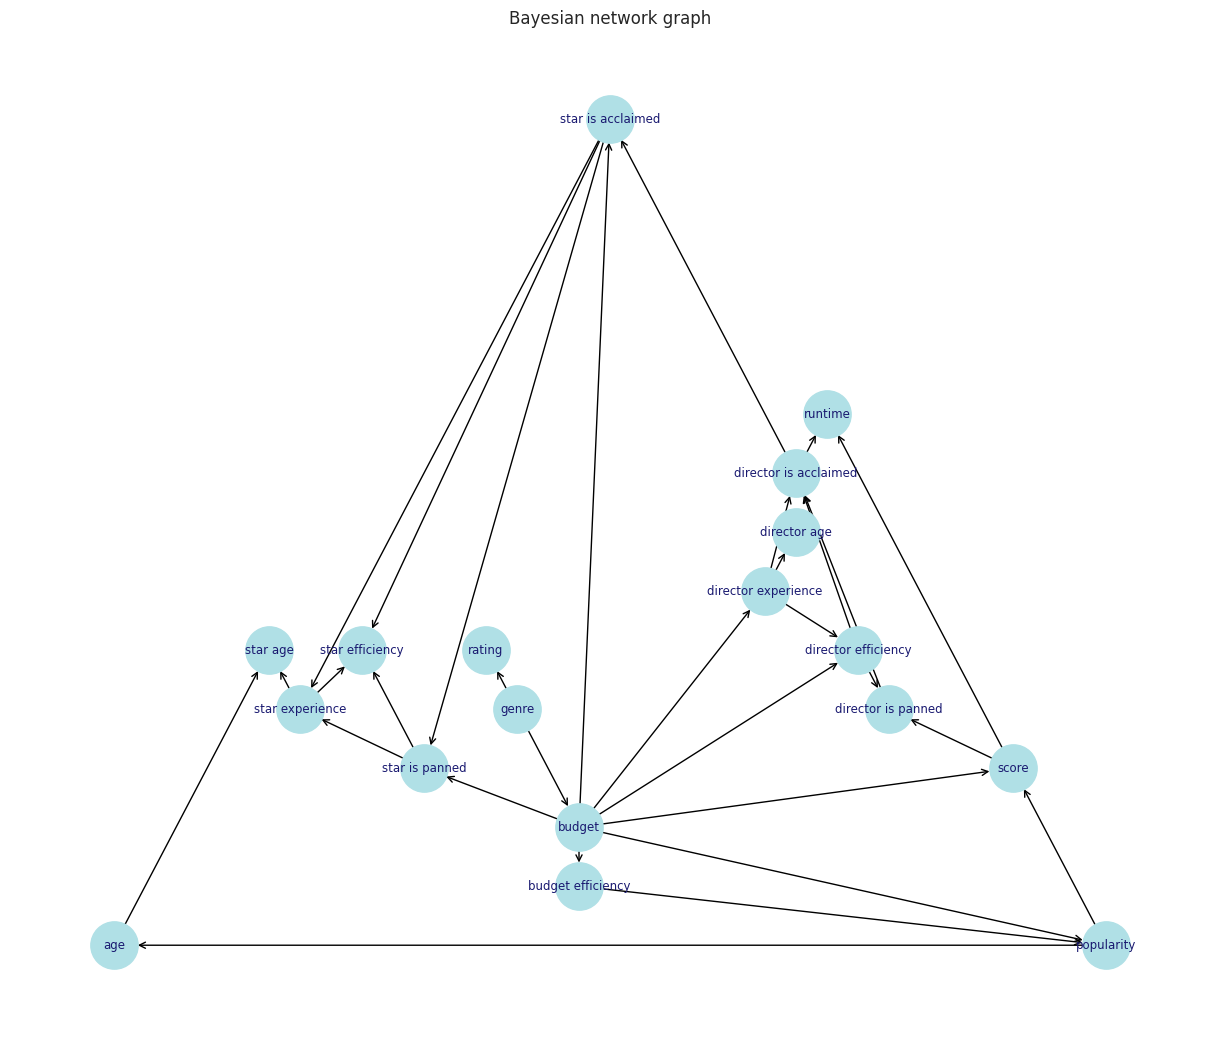

In [14]:
# Modellazione appresa dai dati
model = learn_bayesian_model(df)
visualize_bayesian_model(model)

In [15]:
# Analisi sulle relazioni causali tra le variabili
sensitivity_analysis(model, "budget_efficiency_cat", ["genre_cat", "rating_cat", "runtime_cat", "score_cat"])


Sensibilità di BUDGET_EFFICIENCY_CAT rispetto alla variabile [GENRE_CAT]
* Dato GENRE_CAT = 'Action':
╒═════════════════════════╤═════════════╕
│ BUDGET_EFFICIENCY_CAT   │ Prob. (%)   │
╞═════════════════════════╪═════════════╡
│ 'high'                  │ 33.29%      │
├─────────────────────────┼─────────────┤
│ 'low'                   │ 25.12%      │
├─────────────────────────┼─────────────┤
│ 'mid'                   │ 41.59%      │
╘═════════════════════════╧═════════════╛
* Dato GENRE_CAT = 'Adventure':
╒═════════════════════════╤═════════════╕
│ BUDGET_EFFICIENCY_CAT   │ Prob. (%)   │
╞═════════════════════════╪═════════════╡
│ 'high'                  │ 33.42%      │
├─────────────────────────┼─────────────┤
│ 'low'                   │ 27.52%      │
├─────────────────────────┼─────────────┤
│ 'mid'                   │ 39.05%      │
╘═════════════════════════╧═════════════╛
* Dato GENRE_CAT = 'Animation':
╒═════════════════════════╤═════════════╕
│ BUDGET_EFFICIENCY_CAT   │ Prob. (